In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
feat_trunc_res_cnt_df = pd.read_pickle("./crr_trunc_res_cnt_df.pkl")
feat_trunc_res_cnt_df

,0
Crr 1 PFAM domain,0
Crr Crr interface,12
Crr activity tele-phosphohistidine intermediate,0
FrsA Crr interface,0
GlpK Crr interface,0
GlpK Zinc binding site,0
MalK Crr interface,0
Membrane interface,0
N6-acetyllysine site,0
PTS Crr type-1 domain,0


In [4]:
gene_feat_mut_eff_cnt_df = pd.read_pickle("./crr_feat_mut_eff_cnt_df.pkl")
gene_feat_mut_eff_cnt_df.head()

,functionally disruptive,structurally disruptive,unknown,total
MalK Crr interface,2,2,1,5
FrsA Crr interface,6,4,1,11
PtsI Crr interface,4,2,1,7
GlpK Crr interface,6,4,1,11
PtsH Crr interface,7,5,0,12


In [5]:
df = gene_feat_mut_eff_cnt_df.copy()  # below cells use the original total
df = df.drop(columns="total")
df["coding disruptive"] = 0
for f, r in feat_trunc_res_cnt_df.iterrows():
    if f not in df.index:
        srs = pd.Series({"functionally disruptive": 0, "structurally disruptive": 0,
                         "unknown": 0, "coding disruptive": r[0]}, name=f)
        df = df.append(srs)
    else:
        df.at[f, "coding disruptive"] += r[0]
df["total"] = df.sum(axis=1)
df = df.rename(columns={
    "functionally disruptive": "deleterious (SIFT)",
    "structurally disruptive": "structurally destabilizing (ΔΔG)",
    "coding disruptive": "truncation",
})
display(df)

,deleterious (SIFT),structurally destabilizing (ΔΔG),unknown,truncation,total
MalK Crr interface,2,2,1,0,5
FrsA Crr interface,6,4,1,0,11
PtsI Crr interface,4,2,1,0,7
GlpK Crr interface,6,4,1,0,11
PtsH Crr interface,7,5,0,0,12
PtsG Crr interface,7,5,0,0,12
Crr activity tele-phosphohistidine intermediate,2,2,0,0,4
GlpK Zinc binding site,2,2,0,0,4
Phosphohistidine by HPr,2,2,0,0,4
Crr 1 PFAM domain,0,0,0,0,0


In [6]:
prop_df = df.copy()
prop_df = prop_df.astype(float)
for c in prop_df.columns:
    for r in prop_df.index:
        if df.at[r, "total"] != 0:  # pandas doesn't like whatever value python finds when dividing anything by 0
            prop = df.at[r, c]/df.at[r, "total"]
            prop_df.at[r, c] = prop


df = prop_df.copy()
df = df[df["total"]!=0]  # Don't want to plot anything with 0 mutations.
df = df.sort_values(by="total")
df = df.drop(columns=["total"])
df

,deleterious (SIFT),structurally destabilizing (ΔΔG),unknown,truncation
MalK Crr interface,0.400000,0.400000,0.200000,0.0
FrsA Crr interface,0.545455,0.363636,0.090909,0.0
PtsI Crr interface,0.571429,0.285714,0.142857,0.0
GlpK Crr interface,0.545455,0.363636,0.090909,0.0
PtsH Crr interface,0.583333,0.416667,0.000000,0.0
PtsG Crr interface,0.583333,0.416667,0.000000,0.0
Crr activity tele-phosphohistidine intermediate,0.500000,0.500000,0.000000,0.0
GlpK Zinc binding site,0.500000,0.500000,0.000000,0.0
Phosphohistidine by HPr,0.500000,0.500000,0.000000,0.0
Crr Crr interface,0.000000,0.000000,0.000000,1.0


Text(0, 0.5, 'nearest feature to\nmutated residue')

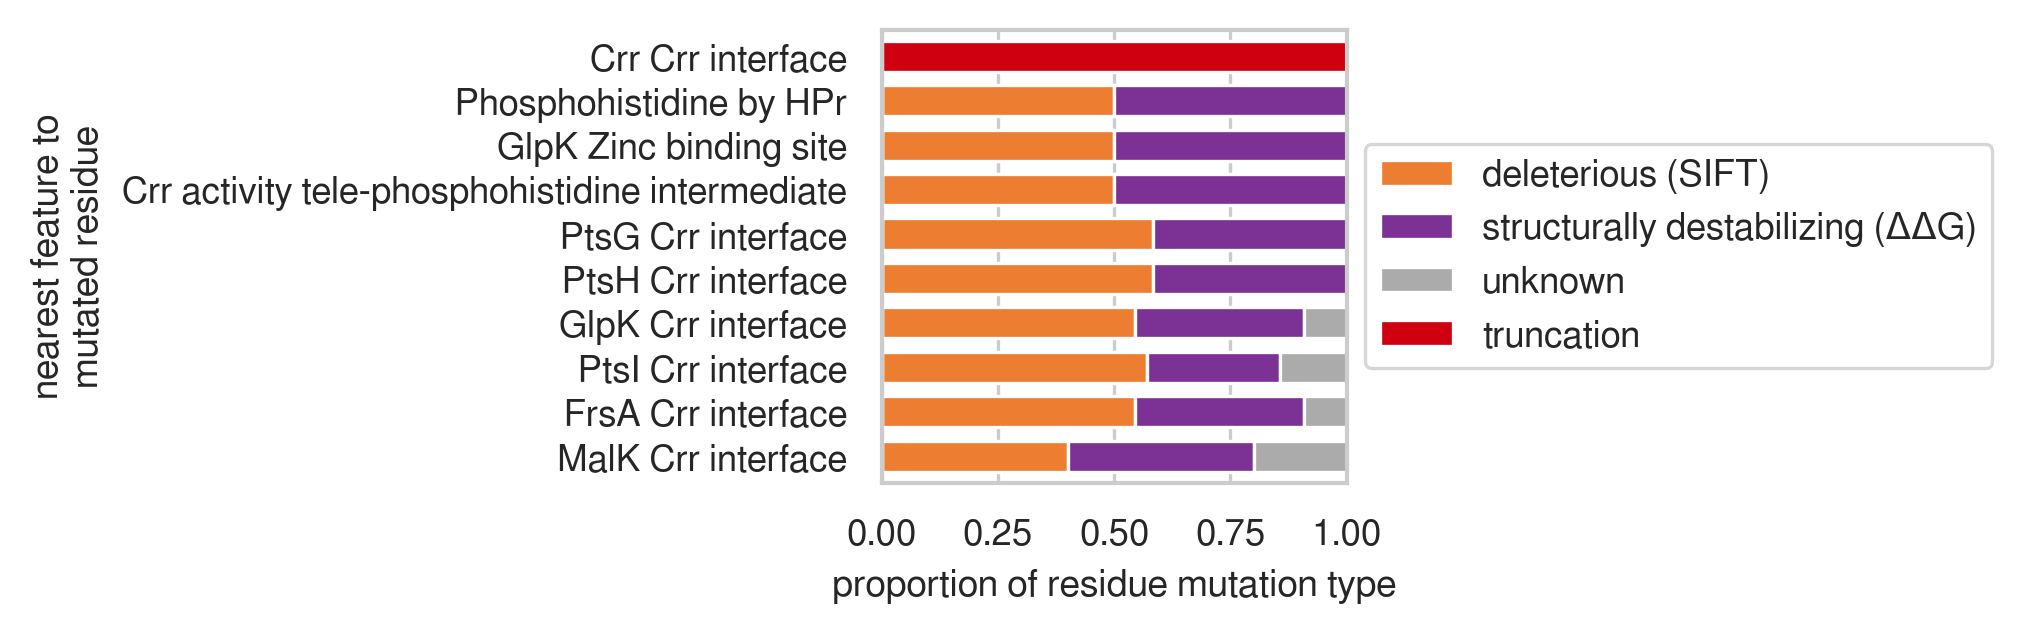

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_palette("deep")
sns.set_context("paper")
# sns.set_style("ticks")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


# # manually sorting to be the same order as the final plot in this NB
# df = df.T[["Transition state stabilizer",
#          "Magnesium binding site",
#          "ATP binding site",
#          "Potassium binding site",
#          "Substrate binding site",
#          "N6-acetyllysine site",
#          "gene subunit interface"]]
# df = df.T

ax = df.plot.barh(
    color=["#ED7D31", "#7B3294", "#ABABAB", "#CF000F"],
    figsize=(2, 2),
    stacked=True,  # Can do stacked since this is the proportion of mutation types and not proportion of mutations
    width=0.7,
)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for tick in ax.get_xticklabels():
    tick.set_fontname("FreeSans")
for tick in ax.get_yticklabels():
    tick.set_fontname("FreeSans")

ax.set_xlabel('proportion of residue mutation type',
              fontname="FreeSans", fontsize=9)
# ax.xaxis.labelpad = -2
ax.set_ylabel('', fontname="FreeSans")
plt.xlim(0, 1)
ax.grid(axis='y', linewidth=0)
# ax.set_title("Truncations dominate mutation types\nto all features")
ax.set_ylabel('nearest feature to\nmutated residue', fontname="FreeSans", fontsize="9")

In [8]:
gene_mut_res_df = pd.read_pickle("./Crr_mut_res_df.pkl")
gene_mut_res_df = gene_mut_res_df.reset_index(drop=True)
gene_mut_res_df.head()

,mutated AA,functionally disruptive,structurally disruptive,nearest feature,unknown
0,34,True,True,MalK Crr interface,False
1,72,True,False,FrsA Crr interface,False
2,72,True,False,PtsI Crr interface,False
3,72,True,False,GlpK Crr interface,False
4,72,True,False,PtsH Crr interface,False


In [9]:
from collections import Counter
d = Counter(gene_mut_res_df["nearest feature"])

# Include truncations
for feat, r in feat_trunc_res_cnt_df.iterrows():
    if r[0] != 0:
        d[feat] += r[0]

# To make it easier to turn into a DF
d2 = dict()
for k, v in d.items():
    d2[k] = [v]
cnt_df = pd.DataFrame(d2).T
cnt_df

,0
MalK Crr interface,3
FrsA Crr interface,7
PtsI Crr interface,5
GlpK Crr interface,7
PtsH Crr interface,7
PtsG Crr interface,7
Crr activity tele-phosphohistidine intermediate,2
GlpK Zinc binding site,2
Phosphohistidine by HPr,2
Crr Crr interface,12


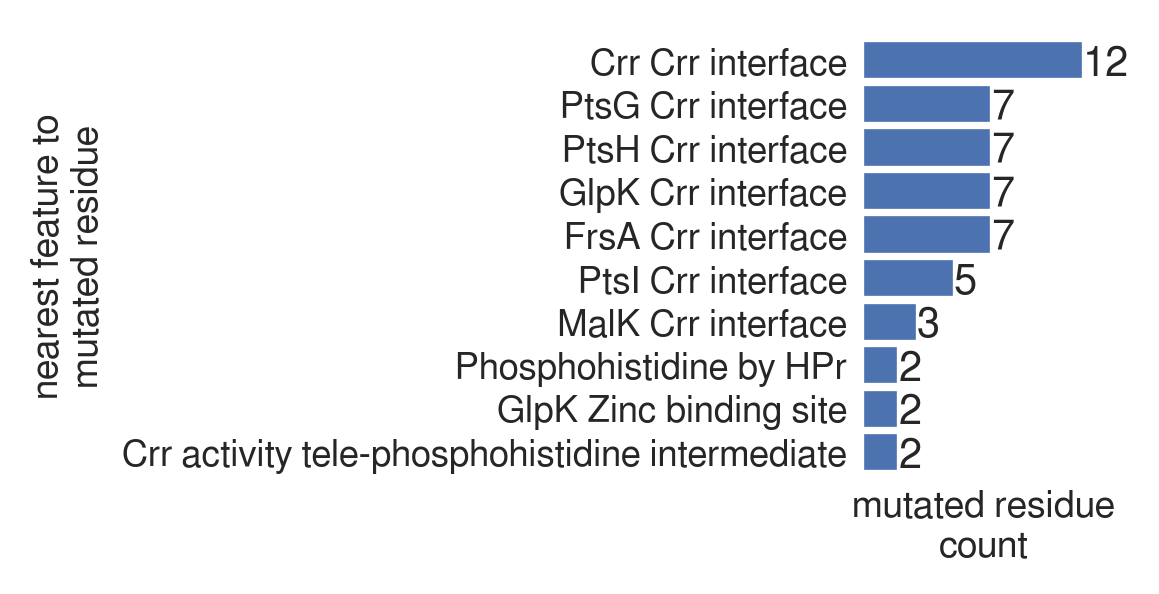

In [13]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("ticks")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

df = cnt_df.copy()
df = df.sort_values(by=0)
ax = df.plot.barh(
    stacked=True,
#     color=colors,
    figsize=(1, 2),
    width=0.90,
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()
# plt.xscale('log')
ax.tick_params(axis='y', which='major', length=0)
# ax.get_xaxis().set_visible(False)

df = df.reset_index()  # Resetting index for the below annotations to work
for i, r in df.iterrows():
    s = r[0]
    ax.text(r[0], i-0.35, s, fontname="FreeSans", fontsize=10)


ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
ax.set_xlabel('mutated residue\ncount', x=0.525, fontname="FreeSans", fontsize=9)
ax.set_ylabel('nearest feature to\nmutated residue', fontname="FreeSans", fontsize=9)
ax.set_title("", fontname="FreeSans")
ax.xaxis.labelpad = -2